In [258]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [259]:
#read in data
month1 = pd.read_csv('~/AA/data1/train_month_1.csv')
month2 = pd.read_csv('~/AA/data1/train_month_2.csv')
month3 = pd.read_csv('~/AA/data1/train_month_3_with_target.csv')

Between the first and second month data, we try to figure out if certain columns changes. We then store the booleans (True/False) in a python list to indicate which features change and which remain constant. Note that we set client_id to True, so we can merge the final datasets together using this column

In [260]:
notequal = []
for col in list(month1):
    notequal.append(not month1[col].equals(month2[col]))
notequal[0] = True
print(notequal)

[True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, True, True]


Repeat for the first and third month. Note that we  append an extra True value at the end, because the third month dataset has an additional column (Target), that was previously not available in the other two datasets.

In [261]:
notequal2 = []
for col in list(month1):
    notequal2.append(not month1[col].equals(month3[col]))
notequal2.append(True)
notequal2[0] = True

print(notequal2)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, True, True, True]


In [262]:
month1.columns

Index(['client_id', 'homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter',
       'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas', 'customer_since_all',
       'customer_since_bank', 'customer_gender', 'customer_birth_date',
       'customer_postal_code', 'customer_occupation_code',
       'customer_self_employed',

In [263]:
#rename the columns in month 3, to prevent features from replacing each other when merging
month3 = month3.add_suffix("_3")
month3 = month3.rename(columns={"client_id_3":"client_id", "target_3":"target"})
month3.head()

,client_id,homebanking_active_3,has_homebanking_3,has_insurance_21_3,has_insurance_23_3,has_life_insurance_fixed_cap_3,has_life_insurance_decreasing_cap_3,has_fire_car_other_insurance_3,has_personal_loan_3,has_mortgage_loan_3,...,customer_since_bank_3,customer_gender_3,customer_birth_date_3,customer_postal_code_3,customer_occupation_code_3,customer_self_employed_3,customer_education_3,customer_children_3,customer_relationship_3,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,1994-08,1,1943-09,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,2017-01,1,1994-02,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,1980-12,2,1936-10,2660,9.0,0,NaN,NaN,single,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,2013-10,1,1946-09,6600,9.0,0,NaN,NaN,NaN,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,2012-11,2,1996-04,8550,9.0,0,NaN,mature,couple,1


Next, we merge the three datasets, only joining features that change from month to months. Anything constant such as date of birth only appear once in the final dataset. All features that appear repeatedly from month to month will have a suffix of a number indicating the feature for the particular month. For example, "has_homebanking_1" is the associated feature that indicates whether a client has homebanking for month 1, while "has_homebanking_2" is for month 2, etc.

In [264]:
full_df = pd.merge(month1, month2.loc[:,notequal], left_on="client_id", right_on="client_id", how="inner", suffixes=["_1", "_2"])
full_df = pd.merge(full_df, month3.loc[:,notequal2], left_on="client_id", right_on="client_id", how="inner")
full_df.head()

,client_id,homebanking_active_1,has_homebanking_1,has_insurance_21_1,has_insurance_23_1,has_life_insurance_fixed_cap_1,has_life_insurance_decreasing_cap_1,has_fire_car_other_insurance_1,has_personal_loan_1,has_mortgage_loan_1,...,bal_pension_saving_3,bal_savings_account_3,bal_savings_account_starter_3,bal_current_account_starter_3,visits_distinct_so_3,visits_distinct_so_areas_3,customer_self_employed_3,customer_children_3,customer_relationship_3,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,0,22000,0,0,1.0,1.0,0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,0,10570,0,0,1.0,1.0,0,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,0,15200,0,0,1.0,1.0,0,NaN,single,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,0,29020,0,0,1.0,1.0,0,NaN,NaN,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,0,13650,0,0,1.0,1.0,0,mature,couple,1


To avoid having multiple repeated features for different months, we combine them either in sequences of binary or an aggregate of count.

In [265]:
#these features have a binary value indicating presence/absence
status_features = list(month1.loc[:, notequal].columns)[:14]
status_features

['client_id',
 'homebanking_active',
 'has_homebanking',
 'has_insurance_21',
 'has_insurance_23',
 'has_life_insurance_fixed_cap',
 'has_life_insurance_decreasing_cap',
 'has_fire_car_other_insurance',
 'has_personal_loan',
 'has_mortgage_loan',
 'has_current_account',
 'has_pension_saving',
 'has_savings_account',
 'has_current_account_starter']

For the first 13 features (excluding client_id), we can concat the binary features into a string sequence to indicate a 3 month combination pattern:

In [266]:
for col in status_features:
    if col != "client_id":
        
        full_df[str(col) + "_seq"] = full_df.filter(regex="^"+str(col)+"_[0-9]").apply(lambda x: ''.join(x.astype(str)), axis=1)

In [171]:
full_df.filter(regex=".*_seq").head()

,homebanking_active_seq,has_homebanking_seq,has_insurance_21_seq,has_insurance_23_seq,has_life_insurance_fixed_cap_seq,has_life_insurance_decreasing_cap_seq,has_fire_car_other_insurance_seq,has_personal_loan_seq,has_mortgage_loan_seq,has_current_account_seq,has_pension_saving_seq,has_savings_account_seq,has_current_account_starter_seq
0,000,000,000,000,000,000,111,000,000,111,000,111,000
1,111,111,000,000,000,000,000,000,000,111,000,111,000
2,111,111,000,000,000,000,111,000,000,111,000,111,000
3,000,000,000,000,000,000,111,000,000,000,000,111,000
4,000,000,000,000,000,000,000,000,000,000,000,111,000


We can also simply aggregate the binary values, to count how many positive occurances a particular client had in the 3 month span for these 14 features:

In [267]:
for col in status_features:
    if col != "client_id":
        
        full_df[str(col) + "_count"] = full_df.filter(regex="^"+str(col)+"_[0-9]").sum(axis=1)

In [269]:
full_df.head()

,client_id,homebanking_active_1,has_homebanking_1,has_insurance_21_1,has_insurance_23_1,has_life_insurance_fixed_cap_1,has_life_insurance_decreasing_cap_1,has_fire_car_other_insurance_1,has_personal_loan_1,has_mortgage_loan_1,...,has_insurance_23_count,has_life_insurance_fixed_cap_count,has_life_insurance_decreasing_cap_count,has_fire_car_other_insurance_count,has_personal_loan_count,has_mortgage_loan_count,has_current_account_count,has_pension_saving_count,has_savings_account_count,has_current_account_starter_count
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,3,0,3,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,3,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,0,0,0,3,0,0,3,0,3,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,0,3,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


For Balance features, we take the difference between the third and first month, to track the change over time. Note that this also includes visits

In [270]:
balance_features = list(month1.loc[:, notequal].columns)[14:28]
balance_features

['bal_insurance_21',
 'bal_insurance_23',
 'cap_life_insurance_fixed_cap',
 'cap_life_insurance_decreasing_cap',
 'prem_fire_car_other_insurance',
 'bal_personal_loan',
 'bal_mortgage_loan',
 'bal_current_account',
 'bal_pension_saving',
 'bal_savings_account',
 'bal_savings_account_starter',
 'bal_current_account_starter',
 'visits_distinct_so',
 'visits_distinct_so_areas']

In [271]:
for col in balance_features:
    full_df[str(col)+"_diff"] = np.array(full_df.filter(regex="^"+str(col)+"_3")) - np.array(full_df.filter(regex="^"+str(col)+"_1"))

Convert Column into datetime object

In [272]:
full_df['customer_since_all_d']=pd.to_datetime(full_df['customer_since_all'], format='%Y-%m-%d')
full_df['customer_birth_date_d']=pd.to_datetime(full_df['customer_birth_date'], format='%Y-%m-%d')


Compute the age of the client

In [273]:
full_df['mob']=(pd.to_datetime('2018-10-01')-full_df['customer_since_all_d'])/np.timedelta64(1, 'M')
full_df['mob'].describe()

count    63463.000000
mean       229.314077
std        136.785738
min          0.000000
25%        117.981889
50%        228.012896
75%        313.994127
max        764.993121
Name: mob, dtype: float64

In [274]:
full_df['age']=2018-pd.DatetimeIndex(full_df['customer_birth_date_d']).year
full_df['mob']=np.where(full_df['customer_since_all'].notna(),(pd.to_datetime('2018-10-01')-full_df['customer_since_all_d'])/np.timedelta64(1, 'M').astype('int'),None)


Instead of looking at each feature's sequence or count separately e.g `has_homebanking_seq`, we make a column `insurance` is a higher level feature that is 1 if either has_insurance_21, has_insurance_23, has_life_insurance_fixed_cap, etc. is 1 otherwise it is 0. We do this for all three months and at the end we can have `insurance_seq`, which is the 3 month sequence of the higher level variable.

In [278]:
list(full_df)

['client_id',
 'homebanking_active_1',
 'has_homebanking_1',
 'has_insurance_21_1',
 'has_insurance_23_1',
 'has_life_insurance_fixed_cap_1',
 'has_life_insurance_decreasing_cap_1',
 'has_fire_car_other_insurance_1',
 'has_personal_loan_1',
 'has_mortgage_loan_1',
 'has_current_account_1',
 'has_pension_saving_1',
 'has_savings_account_1',
 'has_savings_account_starter',
 'has_current_account_starter_1',
 'bal_insurance_21_1',
 'bal_insurance_23_1',
 'cap_life_insurance_fixed_cap_1',
 'cap_life_insurance_decreasing_cap_1',
 'prem_fire_car_other_insurance_1',
 'bal_personal_loan_1',
 'bal_mortgage_loan_1',
 'bal_current_account_1',
 'bal_pension_saving_1',
 'bal_savings_account_1',
 'bal_savings_account_starter_1',
 'bal_current_account_starter_1',
 'visits_distinct_so_1',
 'visits_distinct_so_areas_1',
 'customer_since_all',
 'customer_since_bank',
 'customer_gender',
 'customer_birth_date',
 'customer_postal_code',
 'customer_occupation_code',
 'customer_self_employed_1',
 'customer_e

In [279]:
full_df['insurance_3']=full_df[['has_insurance_21_3','has_insurance_23_3','has_life_insurance_fixed_cap_3','has_life_insurance_decreasing_cap_3','has_fire_car_other_insurance_3']].apply(lambda row: row.max(),axis=1)
full_df['insurance_2']=full_df[['has_insurance_21_2','has_insurance_23_2','has_life_insurance_fixed_cap_2','has_life_insurance_decreasing_cap_2','has_fire_car_other_insurance_2']].apply(lambda row: row.max(),axis=1)
full_df['insurance_1']=full_df[['has_insurance_21_1','has_insurance_23_1','has_life_insurance_fixed_cap_1','has_life_insurance_decreasing_cap_1','has_fire_car_other_insurance_1']].apply(lambda row: row.max(),axis=1)
full_df['savings_3']=full_df[['has_pension_saving_3','has_savings_account_3','has_savings_account_starter_3','has_current_account_starter_3']].apply(lambda row: row.max(),axis=1)
#note has_savings_account_starter did not change from month 1 to month 2 for all clients
full_df['savings_2']=full_df[['has_pension_saving_2','has_savings_account_2','has_savings_account_starter','has_current_account_starter_2']].apply(lambda row: row.max(),axis=1)
full_df['savings_1']=full_df[['has_pension_saving_1','has_savings_account_1','has_savings_account_starter','has_current_account_starter_1']].apply(lambda row: row.max(),axis=1)
full_df['loan_3']=full_df[['has_personal_loan_3','has_mortgage_loan_3','has_current_account_3']].apply(lambda row: row.max(),axis=1)
full_df['loan_2']=full_df[['has_personal_loan_2','has_mortgage_loan_2','has_current_account_2']].apply(lambda row: row.max(),axis=1)
full_df['loan_1']=full_df[['has_personal_loan_1','has_mortgage_loan_1','has_current_account_1']].apply(lambda row: row.max(),axis=1)

#checks whether the customer has an account with the bank for a particular month
full_df['has_account_3']=full_df[['insurance_3','savings_3','loan_3']].apply(lambda row: row.max(),axis=1)
full_df['has_account_2']=full_df[['insurance_2','savings_2','loan_2']].apply(lambda row: row.max(),axis=1)
full_df['has_account_1']=full_df[['insurance_1','savings_1','loan_1']].apply(lambda row: row.max(),axis=1)


#Total balance for a particular month
full_df['bal_insurance_3']=full_df[['bal_insurance_21_3','bal_insurance_23_3']].apply(lambda row: row.sum(),axis=1)
full_df['bal_insurance_2']=full_df[['bal_insurance_21_2','bal_insurance_23_2']].apply(lambda row: row.sum(),axis=1)
full_df['bal_insurance_1']=full_df[['bal_insurance_21_1','bal_insurance_23_1']].apply(lambda row: row.sum(),axis=1)

full_df['bal_savings_3']=full_df[['bal_pension_saving_3','bal_savings_account_3','bal_savings_account_starter_3','bal_current_account_starter_3']].apply(lambda row: row.sum(),axis=1)
full_df['bal_savings_2']=full_df[['bal_pension_saving_2','bal_savings_account_2','bal_savings_account_starter_2','bal_current_account_starter_2']].apply(lambda row: row.sum(),axis=1)
full_df['bal_savings_1']=full_df[['bal_pension_saving_1','bal_savings_account_1','bal_savings_account_starter_1','bal_current_account_starter_1']].apply(lambda row: row.sum(),axis=1)

full_df['bal_loan_3']=full_df[['bal_personal_loan_3','bal_mortgage_loan_3','bal_current_account_3']].apply(lambda row: row.sum(),axis=1)
full_df['bal_loan_2']=full_df[['bal_personal_loan_2','bal_mortgage_loan_2','bal_current_account_2']].apply(lambda row: row.sum(),axis=1)
full_df['bal_loan_1']=full_df[['bal_personal_loan_1','bal_mortgage_loan_1','bal_current_account_1']].apply(lambda row: row.sum(),axis=1)

#debt ratio for each month
full_df['debt_ratio_3']=np.where(full_df['bal_loan_3']/full_df['bal_savings_3']>=0,full_df['bal_loan_3']/full_df['bal_savings_3'],0)
full_df['debt_ratio_2']=np.where(full_df['bal_loan_2']/full_df['bal_savings_2']>=0,full_df['bal_loan_2']/full_df['bal_savings_2'],0)
full_df['debt_ratio_1']=np.where(full_df['bal_loan_1']/full_df['bal_savings_1']>=0,full_df['bal_loan_1']/full_df['bal_savings_1'],0)

#gender
full_df['gender'] = np.where(full_df['customer_gender']==1, 1, 0)

In [281]:
#sumarize the binary variables into sequences rather than keeping individual columns

sequence_var = ['insurance', 'savings', 'loan', 'has_account']

for col in sequence_var:
    full_df[str(col)+"_seq"] = full_df.filter(regex="^" +str(col) +"_[0-9]").apply(lambda x: ''.join(x.astype(str)), axis=1)

#count gives the number of months the indicator was present in a 3-month span
for col in sequence_var:
    full_df[str(col)+"_count"] = full_df.filter(regex="^" +str(col) +"_[0-9]").sum(axis=1)


In [282]:
#for balances, we take the difference between the third month and the first month

balance_var = ['bal_insurance', 'bal_savings', 'bal_loan']

for col in balance_var:
    full_df[str(col)+"_diff"] = np.array(full_df.filter(regex="^" + str(col)+"_3")) - np.array(full_df.filter(regex="^" + str(col)+"_1"))

In [283]:
list(full_df)

['client_id',
 'homebanking_active_1',
 'has_homebanking_1',
 'has_insurance_21_1',
 'has_insurance_23_1',
 'has_life_insurance_fixed_cap_1',
 'has_life_insurance_decreasing_cap_1',
 'has_fire_car_other_insurance_1',
 'has_personal_loan_1',
 'has_mortgage_loan_1',
 'has_current_account_1',
 'has_pension_saving_1',
 'has_savings_account_1',
 'has_savings_account_starter',
 'has_current_account_starter_1',
 'bal_insurance_21_1',
 'bal_insurance_23_1',
 'cap_life_insurance_fixed_cap_1',
 'cap_life_insurance_decreasing_cap_1',
 'prem_fire_car_other_insurance_1',
 'bal_personal_loan_1',
 'bal_mortgage_loan_1',
 'bal_current_account_1',
 'bal_pension_saving_1',
 'bal_savings_account_1',
 'bal_savings_account_starter_1',
 'bal_current_account_starter_1',
 'visits_distinct_so_1',
 'visits_distinct_so_areas_1',
 'customer_since_all',
 'customer_since_bank',
 'customer_gender',
 'customer_birth_date',
 'customer_postal_code',
 'customer_occupation_code',
 'customer_self_employed_1',
 'customer_e

In [284]:
#customer self employed status summarized

full_df['customer_self_employed_seq'] = full_df.filter(regex="^customer_self_employed_[0-9]").apply(lambda x: ''.join(x.astype(str)), axis=1)

full_df['customer_self_employed_count'] = full_df.filter(regex="^customer_self_employed_[0-9]").sum(axis=1)





#customer relationship

# Outliers and missing values


### Debt ratio
For customers without savings balance, the debt ratio is defined as infinite therefore we set a maximum cap for these cases

In [285]:
full_df[(full_df['bal_savings_1']==0)&(full_df['bal_loan_1']>0)]['debt_ratio_1'].count() # Check for de ratios as infinity -1775 obs
full_df[(full_df['bal_savings_2']==0)&(full_df['bal_loan_2']>0)]['debt_ratio_2'].count() # Check for de ratios as infinity - 1769 obs
full_df[(full_df['bal_savings_3']==0)&(full_df['bal_loan_3']>0)]['debt_ratio_3'].count() # Check for de ratios as infinity - 1763 obs
full_df[full_df['debt_ratio_1'] >1][{'debt_ratio_1','bal_savings_1','bal_loan_1'}]

,bal_loan_1,bal_savings_1,debt_ratio_1
9,12630,8850,1.427119
36,100710,37380,2.694222
37,60910,7660,7.951697
40,5880,0,inf
45,2900,2630,1.102662
...,...,...,...
63668,56550,7020,8.055556
63674,85580,5090,16.813360
63676,10560,0,inf
63691,168390,16240,10.368842


In [286]:
full_df.loc[(full_df['bal_savings_1']==0)&(full_df['bal_loan_1']>0), 'debt_ratio_1'] = 100
full_df.loc[full_df['debt_ratio_1']>100, 'debt_ratio_1'] = 100
full_df.loc[(full_df['bal_savings_2']==0)&(full_df['bal_loan_2']>0), 'debt_ratio_2'] = 100
full_df.loc[full_df['debt_ratio_2']>100, 'debt_ratio_2'] = 100
full_df.loc[(full_df['bal_savings_3']==0)&(full_df['bal_loan_3']>0), 'debt_ratio_3'] = 100
full_df.loc[full_df['debt_ratio_3']>100, 'debt_ratio_3'] = 100

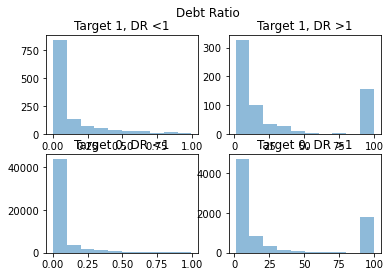

In [287]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Debt Ratio')
axs[0, 0].set_title('Target 1, DR <1')
axs[0,0].hist('debt_ratio_1', data=full_df[(full_df['target'] == 1) & (full_df['debt_ratio_1'] <1) ], alpha=0.5, label='1');
axs[0, 1].set_title('Target 1, DR >1')
axs[0,1].hist('debt_ratio_1', data=full_df[(full_df['target'] == 1) & (full_df['debt_ratio_1'] >1) ], alpha=0.5, label='1');
axs[1, 0].set_title('Target 0, DR <1')
axs[1,0].hist('debt_ratio_1', data=full_df[(full_df['target'] == 0) & (full_df['debt_ratio_1'] <1) ], alpha=0.5, label='1');
axs[1, 1].set_title('Target 0, DR >1')
axs[1,1].hist('debt_ratio_1', data=full_df[(full_df['target'] == 0) & (full_df['debt_ratio_1'] >1) ], alpha=0.5, label='1');

In [288]:
full_df['debt_ratio_diff']=full_df['debt_ratio_3']-full_df['debt_ratio_1']
full_df['debt_ratio_diff'].describe()

count    63697.000000
mean        -0.044819
std          2.638034
min       -100.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: debt_ratio_diff, dtype: float64

### Age

According to the data there are customers older than 100 years old, we will set a cap for these cases instead of deleting these observations


In [289]:
full_df['age'].describe()

count    63697.000000
mean        56.605759
std         20.042772
min         18.000000
25%         41.000000
50%         58.000000
75%         73.000000
max        154.000000
Name: age, dtype: float64

In [290]:
full_df[full_df['age']>100] # Check for ages above 100 - 129 obs
full_df.loc[full_df['age']>100, 'age'] = 100

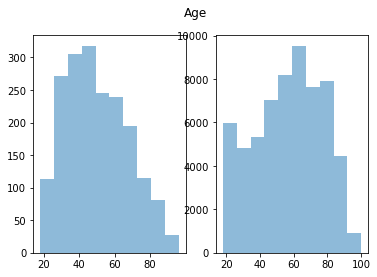

In [291]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Age')
ax1.hist('age', data=full_df[full_df['target'] == 1], alpha=0.5, label='1');
ax2.hist('age', data=full_df[full_df['target'] == 0], alpha=0.5, label='0');

### MoB -Months on Books

The number of months the person has been a customer for the bank. For 234 missing values, the average of the variable is assigned 


In [299]:
full_df['mob'].describe()

count     6.369700e+04
unique    6.620000e+02
top       1.191197e+18
freq      3.050000e+03
Name: mob, dtype: float64

In [293]:
full_df[full_df['mob'].isna()==True][{'mob','customer_since_all','customer_since_bank','customer_birth_date','age'}] #234 obs without customer since all

,customer_birth_date,mob,age,customer_since_bank,customer_since_all
331,1935-07,None,83,NaN,NaN
510,1969-07,None,49,NaN,NaN
820,1949-12,None,69,NaN,NaN
971,1976-01,None,42,NaN,NaN
1443,1983-08,None,35,NaN,NaN
...,...,...,...,...,...
63075,1938-06,None,80,NaN,NaN
63134,1953-07,None,65,NaN,NaN
63307,1968-08,None,50,NaN,NaN
63364,1938-02,None,80,NaN,NaN


In [301]:
full_df.loc[full_df['mob'].isna(), 'mob'] = full_df['age'].mean()


In [302]:
full_df['mob'].describe()

count     6.369700e+04
unique    6.620000e+02
top       1.191197e+18
freq      3.050000e+03
Name: mob, dtype: float64

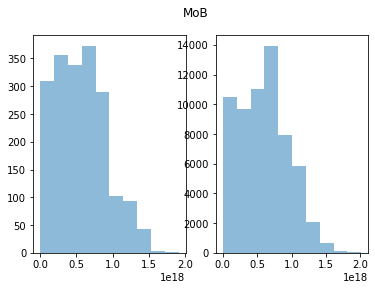

In [303]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('MoB')
ax1.hist('mob', data=full_df[full_df['target'] == 1], alpha=0.5, label='1');
ax2.hist('mob', data=full_df[full_df['target'] == 0], alpha=0.5, label='0');

### Customer Children

The current possible values are: NA, yes, no, adolescent, young, baby, mature, etc. We will remap these values to 0, 1, 2. Here 0 indicates missing, 1 indicates no and 2 indicates a children present (regardless of age). We will then proceed with creating sequence variable 'customer_children_seq' and a categorical variable with the maximum value of the 3 months 'customer_children_cat'


In [304]:
def clean_children(text):
    if pd.isnull(text):
        new_val = 0
    elif str(text) == "no":
        new_val = 1
    else:
        new_val = 2
    
    return new_val

full_df["customer_children_clean_1"]  = full_df['customer_children_1'].apply(clean_children)
full_df["customer_children_clean_2"]  = full_df['customer_children_2'].apply(clean_children)
full_df["customer_children_clean_3"]  = full_df['customer_children_3'].apply(clean_children)

full_df['customer_children_seq'] = full_df.filter(regex="^customer_children_clean_[0-9]").apply(lambda x: ''.join(x.astype(str)), axis=1)
full_df['customer_children_cat'] = full_df.filter(regex="^customer_children_clean_[0-9]").apply(lambda x:x.max(), axis=1)

full_df['customer_children_seq'].value_counts()
full_df['customer_children_cat'].value_counts()


1    22987
0    22380
2    18330
Name: customer_children_cat, dtype: int64

### Customer Relationship

Customer relationship can take the following values: NA (=0), single (=1), couple (=2). We will remap it as 0, 1, 2 respectively and compute the sequence of the relationship over a 3 month period and the categorical variable defined as the maximum over the 3 months

In [305]:
def clean_relationship(status):
    if pd.isnull(status):
        new_val = 0
    elif status == "single":
        new_val = 1
    else:
        new_val = 2

    return new_val

full_df["customer_relationship_clean_1"]  = full_df['customer_relationship_1'].apply(clean_children)
full_df["customer_relationship_clean_2"]  = full_df['customer_relationship_2'].apply(clean_children)
full_df["customer_relationship_clean_3"]  = full_df['customer_relationship_3'].apply(clean_children)

full_df['customer_relationship_seq'] = full_df.filter(regex="^customer_relationship_clean_[0-9]").apply(lambda x: ''.join(x.astype(str)), axis=1)
full_df['customer_relationship_cat'] = full_df.filter(regex="^customer_relationship_clean_[0-9]").apply(lambda x:x.max(), axis=1)

full_df['customer_relationship_seq'].value_counts()
full_df['customer_relationship_cat'].value_counts()

2    49813
0    13884
Name: customer_relationship_cat, dtype: int64

In [88]:
full_df.head()

,client_id,homebanking_active_1,has_homebanking_1,has_insurance_21_1,has_insurance_23_1,has_life_insurance_fixed_cap_1,has_life_insurance_decreasing_cap_1,has_fire_car_other_insurance_1,has_personal_loan_1,has_mortgage_loan_1,...,bal_loan_diff,customer_self_employed_seq,customer_children_clean_1,customer_children_clean_2,customer_children_clean_3,customer_children_seq,customer_relationship_clean_1,customer_relationship_clean_2,customer_relationship_clean_3,customer_relationship_seq
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,-370,000,0,0,0,000,0,0,0,000
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,560,000,2,2,2,222,2,2,2,222
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,420,000,0,0,0,000,2,2,2,222
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,0,000,0,0,0,000,0,0,0,000
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,0,000,2,2,2,222,2,2,2,222


# Descriptive statistics per group

### Differences M1 and M3


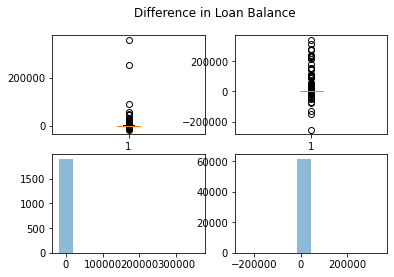

In [306]:
fig, ax = plt.subplots(2, 2)
fig.suptitle('Difference in Loan Balance')
ax[0,0].boxplot(full_df[(full_df['target'] == 1)]['bal_loan_diff']);
ax[0,1].boxplot(full_df[full_df['target'] == 0]['bal_loan_diff']);
ax[1,0].hist('bal_loan_diff', data=full_df[full_df['target'] == 1], alpha=0.5, label='0');
ax[1,1].hist('bal_loan_diff', data=full_df[full_df['target'] == 0], alpha=0.5, label='0');

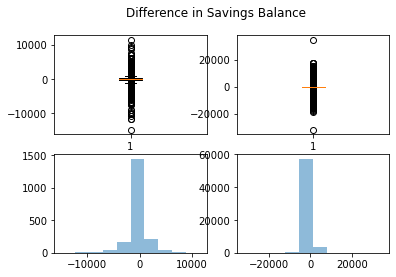

In [307]:
fig, ax = plt.subplots(2, 2)
fig.suptitle('Difference in Savings Balance')
ax[0,0].boxplot(full_df[(full_df['target'] == 1)]['bal_savings_diff']);
ax[0,1].boxplot(full_df[full_df['target'] == 0]['bal_savings_diff']);
ax[1,0].hist('bal_savings_diff', data=full_df[full_df['target'] == 1], alpha=0.5, label='0');
ax[1,1].hist('bal_savings_diff', data=full_df[full_df['target'] == 0], alpha=0.5, label='0');

In [308]:
full_df.groupby('target').agg({'bal_loan_diff':'mean','bal_savings_diff':'mean', 'bal_insurance_diff':'mean','debt_ratio_diff':'mean'})

,bal_loan_diff,bal_savings_diff,bal_insurance_diff,debt_ratio_diff
target,,,,
0,19.358572,112.418425,2.569921,-0.044430
1,215.844224,-160.167277,13.857815,-0.057393


In [309]:
full_df.groupby('target').agg({'bal_loan_3':'mean','bal_savings_3':'mean', 'bal_insurance_3':'mean','debt_ratio_3':'mean'})

,bal_loan_3,bal_savings_3,bal_insurance_3,debt_ratio_3
target,,,,
0,9933.231743,18337.756215,501.961187,3.782337
1,31966.257188,13546.753790,616.215369,11.400607


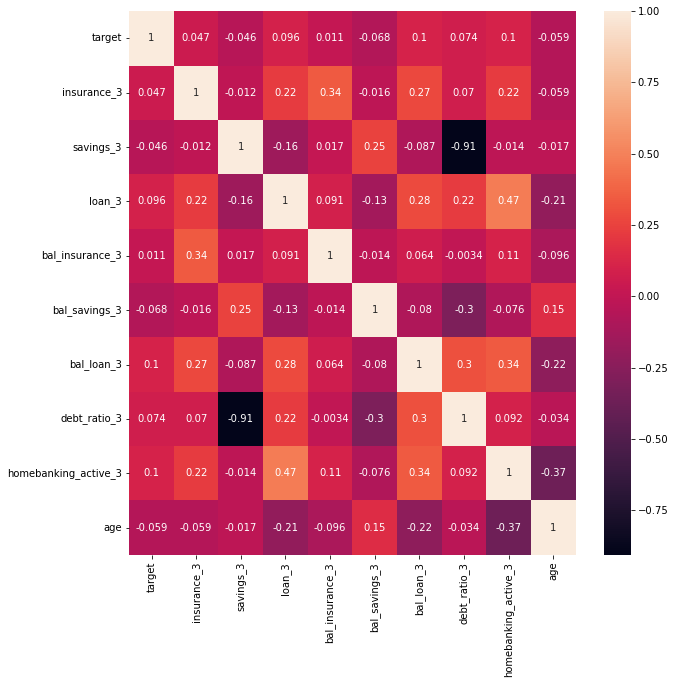

In [310]:
fig, ax = plt.subplots(figsize=(10,10)) 
X_f=full_df[['target','insurance_3','savings_3','loan_3','bal_insurance_3','bal_savings_3','bal_loan_3','debt_ratio_3','homebanking_active_3','mob','age']]
sns.heatmap(X_f[X_f.columns[0:]].corr(), annot=True);

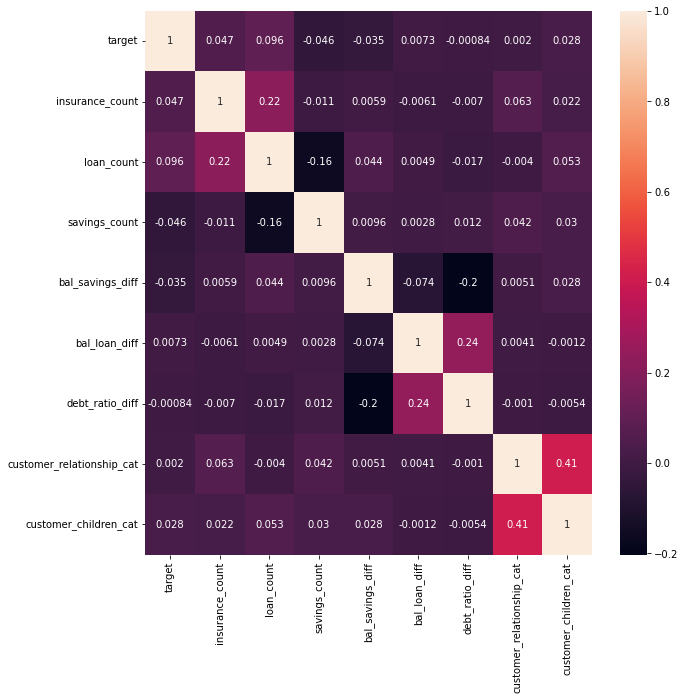

In [311]:
fig, ax = plt.subplots(figsize=(10,10)) 
X_f=full_df[['target','insurance_count','loan_count','savings_count','bal_savings_diff','bal_loan_diff','debt_ratio_diff','customer_relationship_cat','customer_children_cat']]
sns.heatmap(X_f[X_f.columns[0:]].corr(), annot=True);

In [312]:
df_corr = full_df[full_df.columns[0:]].corr()['target'][:-1]
df_corr.sort_values( ascending=False)

target                      1.000000
bal_loan_3                  0.102839
homebanking_active_count    0.102643
bal_loan_2                  0.101995
bal_loan_1                  0.101907
                              ...   
bal_savings_account_3      -0.071638
has_account_3                    NaN
has_account_2                    NaN
has_account_1                    NaN
has_account_count                NaN
Name: target, Length: 160, dtype: float64

In [313]:
list(full_df.filter(regex="^(.*_[0-9]$)"))

['homebanking_active_1',
 'has_homebanking_1',
 'has_insurance_21_1',
 'has_insurance_23_1',
 'has_life_insurance_fixed_cap_1',
 'has_life_insurance_decreasing_cap_1',
 'has_fire_car_other_insurance_1',
 'has_personal_loan_1',
 'has_mortgage_loan_1',
 'has_current_account_1',
 'has_pension_saving_1',
 'has_savings_account_1',
 'has_current_account_starter_1',
 'bal_insurance_21_1',
 'bal_insurance_23_1',
 'cap_life_insurance_fixed_cap_1',
 'cap_life_insurance_decreasing_cap_1',
 'prem_fire_car_other_insurance_1',
 'bal_personal_loan_1',
 'bal_mortgage_loan_1',
 'bal_current_account_1',
 'bal_pension_saving_1',
 'bal_savings_account_1',
 'bal_savings_account_starter_1',
 'bal_current_account_starter_1',
 'visits_distinct_so_1',
 'visits_distinct_so_areas_1',
 'customer_self_employed_1',
 'customer_children_1',
 'customer_relationship_1',
 'homebanking_active_2',
 'has_homebanking_2',
 'has_insurance_21_2',
 'has_insurance_23_2',
 'has_life_insurance_fixed_cap_2',
 'has_life_insurance_de

In [315]:
#exclude all features with _[0-9]

exclude_lst = list(full_df.filter(regex="^(.*_[1,2]$)"))

final_df = full_df.drop(exclude_lst, axis=1)

In [316]:
final_df.head()

,client_id,has_savings_account_starter,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_education,homebanking_active_3,...,bal_loan_diff,customer_self_employed_seq,customer_self_employed_count,debt_ratio_diff,customer_children_clean_3,customer_children_seq,customer_children_cat,customer_relationship_clean_3,customer_relationship_seq,customer_relationship_cat
0,910df42ad36243aa4ce16324cd7b15b0,0,1983-03,1994-08,1,1943-09,3630,9.0,0.0,0,...,-370,000,0,-0.021182,0,000,0,0,000,0
1,4e19dc3a54323c5bbfc374664b950cd1,0,2017-01,2017-01,1,1994-02,2460,9.0,NaN,1,...,560,000,0,0.052002,2,222,2,2,222,2
2,f5d08db1b86c0cb0f566bf446cff1fb4,0,1980-12,1980-12,2,1936-10,2660,9.0,NaN,1,...,420,000,0,0.032129,0,000,0,2,222,2
3,26170ecf63653e215c52f4262c1c4859,0,1998-08,2013-10,1,1946-09,6600,9.0,NaN,0,...,0,000,0,0.000000,0,000,0,0,000,0
4,c078009957dffb64f20e61b41220a976,0,2012-11,2012-11,2,1996-04,8550,9.0,NaN,0,...,0,000,0,0.000000,2,222,2,2,222,2


In [317]:
final_df.to_csv("data_train_final.csv", index=False)